In [1]:
import scanpy as sc
import singleCellHaystack as hs

# Load data

In [2]:
adata = sc.datasets.visium_sge()
adata

100%|██████████| 9.50M/9.50M [00:00<00:00, 28.1MB/s]
100%|██████████| 26.9M/26.9M [00:00<00:00, 29.6MB/s]
/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3798 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [3]:
adata.var_names_make_unique()

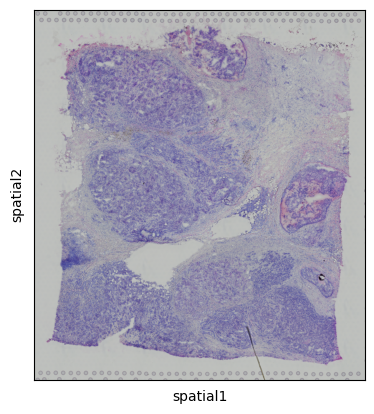

In [4]:
sc.pl.spatial(adata)

# Process

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

# Haystack

In [6]:
res = hs.haystack(adata, coord="spatial")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 11678 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 24923 features ...


100%|██████████| 24923/24923 [00:11<00:00, 2235.51it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████| 100/100 [00:05<00:00, 18.89it/s]


> calculating P values ...
> done.


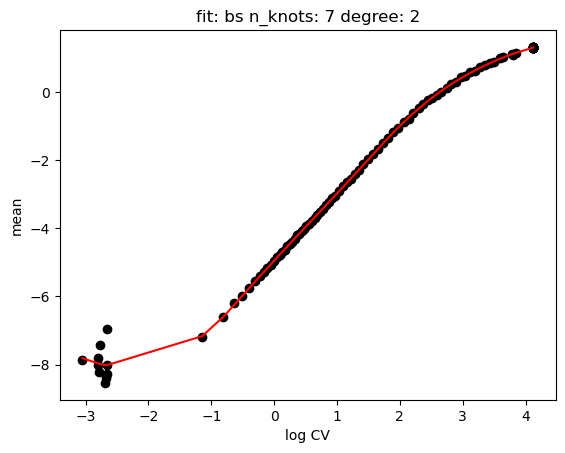

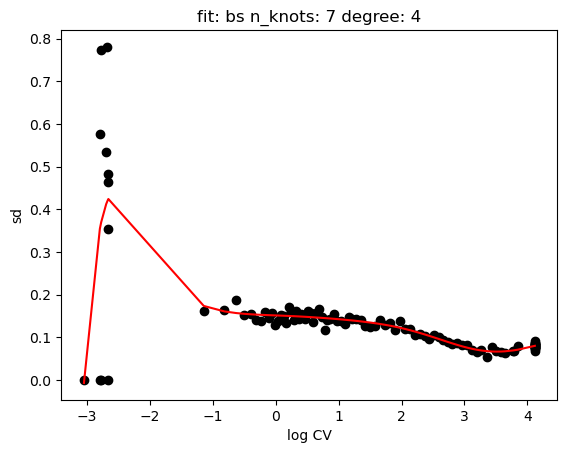

In [7]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

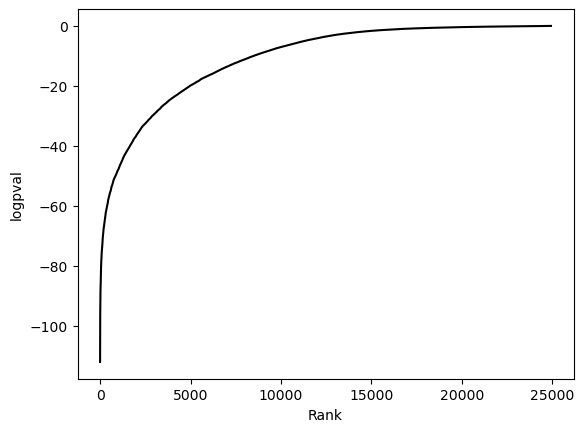

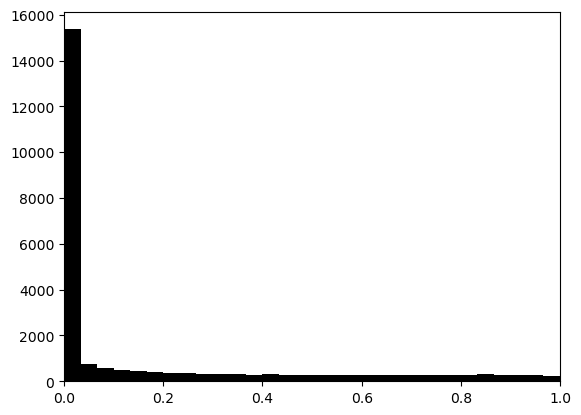

In [8]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

In [9]:
sum = res.top_features(n=10)
sum

,gene,KLD,pval,pval_adj,logpval,logpval_adj
8277,CRISP3,0.131658,1.002692e-112,2.499010e-108,-111.998832,-107.602232
5157,CPB1,0.052947,8.150681e-112,2.031394e-107,-111.088806,-106.692206
24196,S100G,0.071816,6.617157e-103,1.649194e-98,-102.179329,-97.782728
7116,CXCL14,0.044309,8.811847e-103,2.196177e-98,-102.054933,-97.658333
15913,SLITRK6,0.340828,2.602061e-102,6.485117e-98,-101.584682,-97.188082
...,...,...,...,...,...,...
1851,AL021026.1,1.433165,9.995057e-01,1.000000e+00,-0.000215,0.000000
825,AC104170.1,1.796741,9.996506e-01,1.000000e+00,-0.000152,0.000000
6164,AC093591.2,2.445691,9.997189e-01,1.000000e+00,-0.000122,0.000000
10991,RFX3-AS1,1.757526,9.997641e-01,1.000000e+00,-0.000102,0.000000


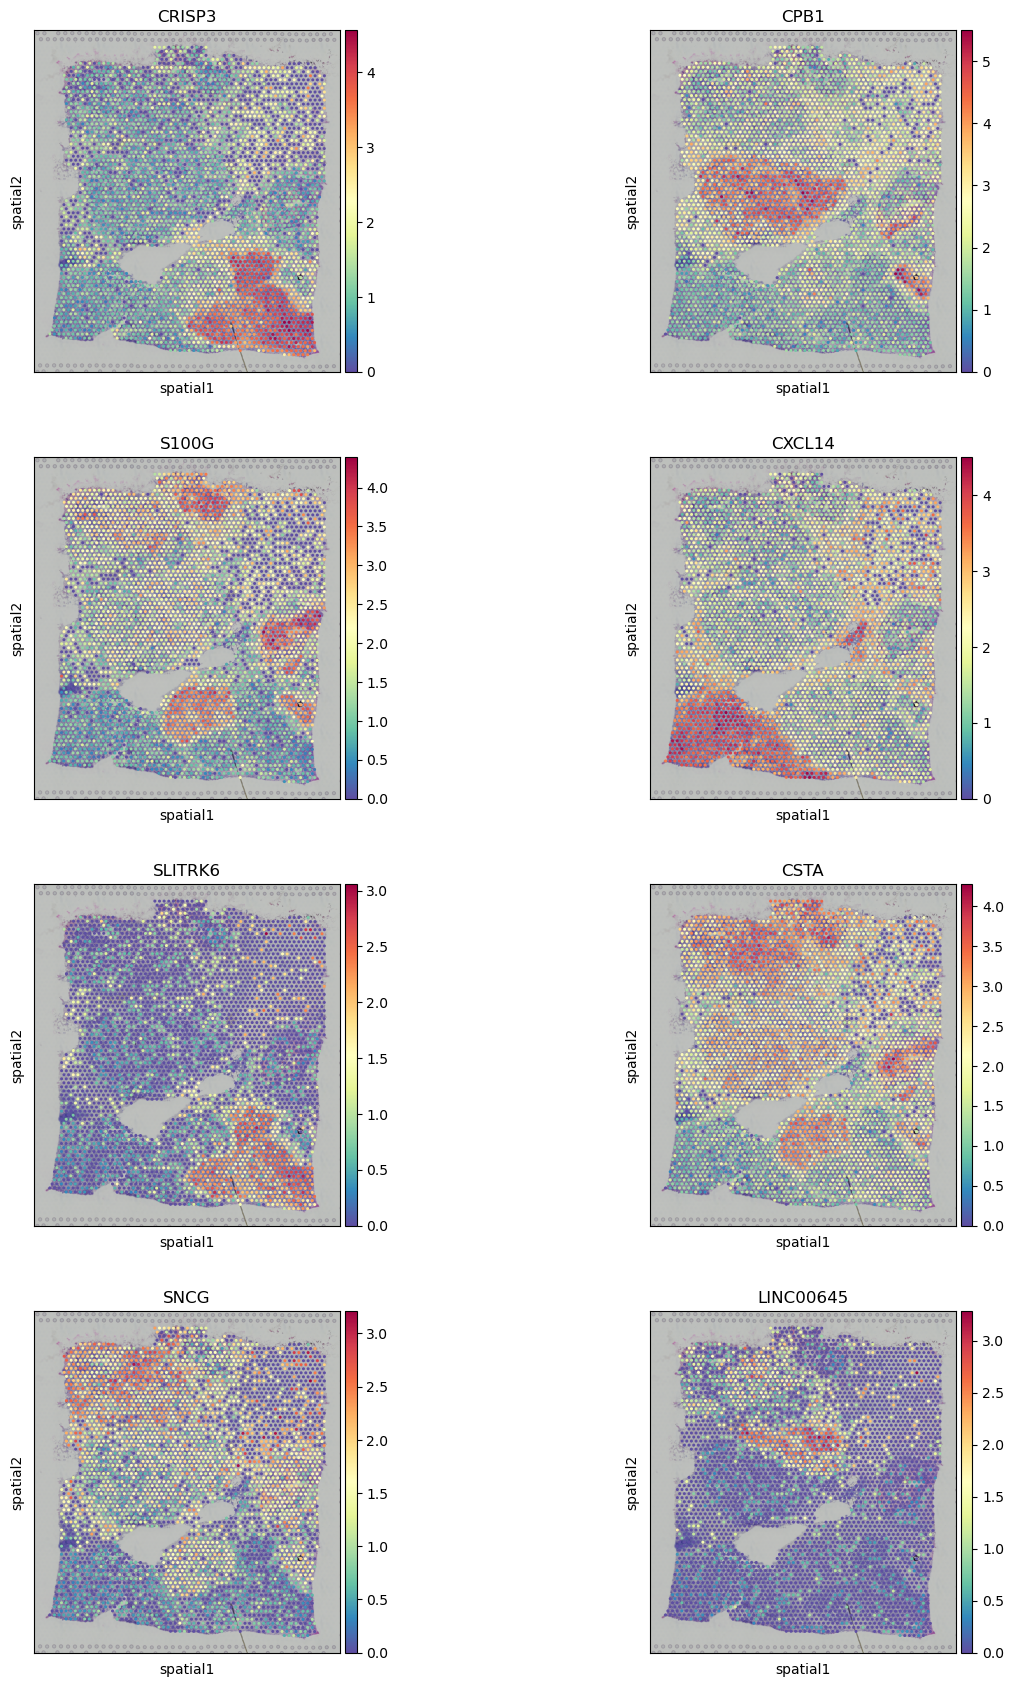

In [10]:
sc.pl.spatial(adata, color=sum.gene.iloc[:8], ncols=2, cmap="Spectral_r")

# Export results

In [11]:
#sum.to_csv("results-spatial.csv")